In [2]:
import keras
keras.__version__

'2.2.4'

In [12]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [13]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key,value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [14]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [15]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

one-hot 编码

In [17]:
def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

Keras 内置 one-hot 编码方法

In [ ]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to categorical(train_labels)
one_hot_test_labels = to categorical(test_labels)

In [29]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64,activation = 'relu'))
model.add(layers.Dense(46,activation = 'softmax'))

In [30]:
model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [33]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [34]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val,y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 3s 318us/step - loss: 2.6079 - acc: 0.5273 - val_loss: 1.6794 - val_acc: 0.6340
Epoch 2/20
7982/7982 [==============================] - 2s 243us/step - loss: 1.3957 - acc: 0.7046 - val_loss: 1.2810 - val_acc: 0.7170
Epoch 3/20
7982/7982 [==============================] - 2s 247us/step - loss: 1.0527 - acc: 0.7702 - val_loss: 1.1197 - val_acc: 0.7550
Epoch 4/20
7982/7982 [==============================] - 2s 244us/step - loss: 0.8290 - acc: 0.8211 - val_loss: 1.0195 - val_acc: 0.7870
Epoch 5/20
7982/7982 [==============================] - 2s 246us/step - loss: 0.6638 - acc: 0.8599 - val_loss: 0.9689 - val_acc: 0.7990
Epoch 6/20
7982/7982 [==============================] - 2s 241us/step - loss: 0.5297 - acc: 0.8925 - val_loss: 0.9213 - val_acc: 0.8130
Epoch 7/20
7982/7982 [==============================] - 2s 244us/step - loss: 0.4284 - acc: 0.9109 - val_loss: 0.9193 - val_acc: 0.8070


In [39]:
history_dict = history.history 
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

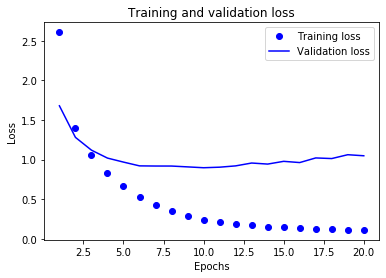

In [37]:
import matplotlib.pyplot as plt


loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1,len(loss_values)+ 1)

plt.plot(epochs, loss_values,'bo',label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

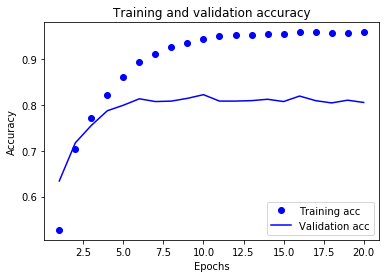

In [40]:
plt.clf()
acc = history_dict['acc']
val_acc = history_dict['val_acc']

epochs = range(1,len(acc)+ 1)

plt.plot(epochs, acc,'bo',label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()